In [1]:
import cv2
import cv2
import numpy as np
import math
import sys
from colormap import rgb2hex
from matplotlib import pyplot as plt
import time
import ThermSAS.thermalMap as ThermalMap
import math

thermalObj = ThermalMap.ThermalMap()

In [436]:
def sampleVideo(vid, sampleRate):
    
    video = cv2.VideoCapture(vid)

    fps = video.get(cv2.CAP_PROP_FPS)
    #Therefore we need to sample every xth frame
    sampleDuration = fps * sampleRate
    sampledList = []
    index = 0
    while(True):
        ret, frame = video.read()
        if not ret: 
            break
        if index%(sampleDuration)==0:
            sampledList.append(frame)
        index += 1
    
    return sampledList

    
def resizeImage(img, percent):
    width = int(img.shape[1] * percent / 100)
    height = int(img.shape[0] * percent / 100)
    dim = (width, height)

    # resize image
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

def cropImage(img, percent):
    width = img.shape[1]
    height = img.shape[0]
    widthCrop = int(width * percent / 100)
    heightCrop = int(height * percent / 100)
    return img[heightCrop:height-heightCrop, widthCrop:width-widthCrop]

def getContours(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]

    h_img = cv2.merge((h, h, h))
    rgb = cv2.cvtColor(h_img, cv2.COLOR_HSV2RGB)	
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    gausBlur = cv2.GaussianBlur(gray,(3, 3),cv2.BORDER_DEFAULT)


    thresh = cv2.adaptiveThreshold(gausBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 115, 4)

    se = np.ones((7,7), dtype='uint8')
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, se)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)
    
    image_cpy = img.copy()
    cv2.drawContours(image=image_cpy, contours=contours, contourIdx=-1, color=(0,255,255),
                thickness=1, lineType=cv2.LINE_AA)

    plt.imshow(cv2.cvtColor(image_cpy, cv2.COLOR_BGR2RGB))
    plt.title('Contour')
    plt.show()
    
    lst_intensities = []
    start = time.time()
    # For each list of contour points...
    for i in range(len(contours)):
        # Create a mask image that contains the contour filled in
        cimg = np.zeros_like(img)

        cv2.drawContours(cimg, contours, i, color=255, thickness=-1)

        # Access the image pixels and create a 1D numpy array
        pts = np.where(cimg == 255)

        lst_intensities.append(img[pts[0], pts[1]])

    for i in range(len(lst_intensities)):
        totalTemp = 0
        for p in range(len(lst_intensities[i])):
            
            rgbInt = [int(lst_intensities[i][p][0]), int(lst_intensities[i][p][1]), int(lst_intensities[i][p][2])]
            temp = thermalObj.get_temp(rgbInt)
            totalTemp += temp
        avgTemp = totalTemp/(len(lst_intensities[i]))
        print("Average Temp of Contour", i, "is: %.2f" % avgTemp, "°C")
    

In [67]:
frames = sampleVideo("TestData/Pan/2021.10.09-19.57.44 [Steak].mp4", 10)

Current time is: 0 seconds


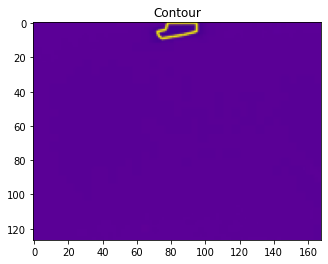

Average Temp of Contour 0 is: 14.45 °C
Current time is: 10 seconds


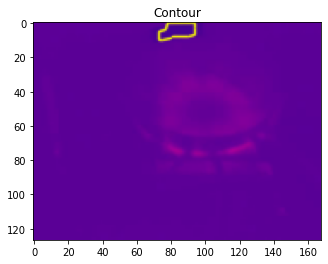

Average Temp of Contour 0 is: 15.64 °C
Current time is: 20 seconds


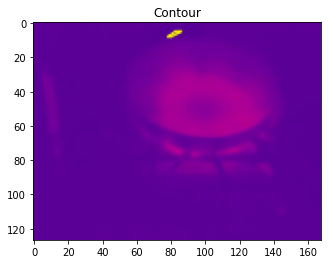

Average Temp of Contour 0 is: 23.87 °C
Current time is: 30 seconds


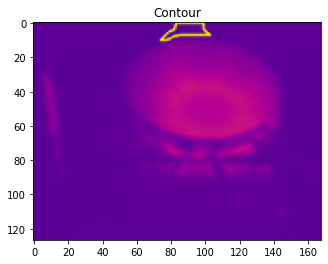

Average Temp of Contour 0 is: 26.32 °C
Current time is: 40 seconds


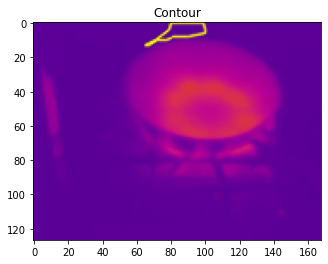

Average Temp of Contour 0 is: 26.47 °C
Current time is: 50 seconds


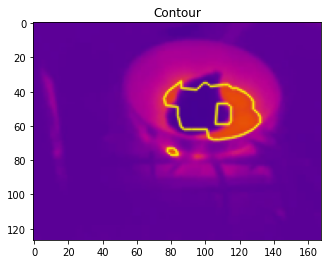

Average Temp of Contour 0 is: 139.60 °C
Average Temp of Contour 1 is: 44.84 °C
Average Temp of Contour 2 is: 80.97 °C
Current time is: 60 seconds


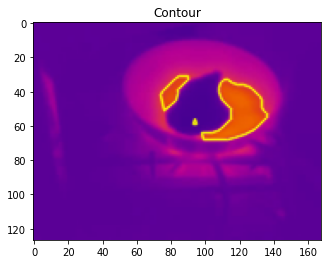

Average Temp of Contour 0 is: 17.90 °C
Average Temp of Contour 1 is: 160.98 °C
Average Temp of Contour 2 is: 144.62 °C
Current time is: 70 seconds


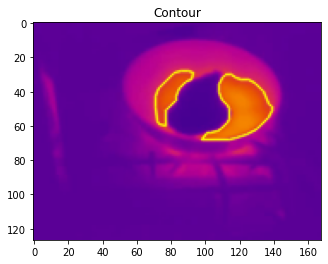

Average Temp of Contour 0 is: 174.64 °C
Average Temp of Contour 1 is: 150.60 °C
Current time is: 80 seconds


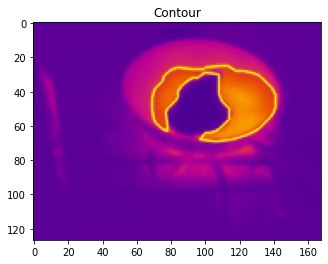

Average Temp of Contour 0 is: 172.04 °C
Current time is: 90 seconds


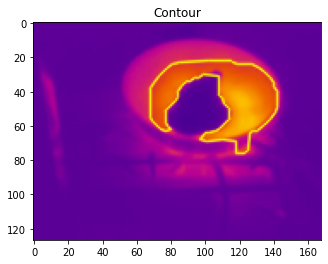

Average Temp of Contour 0 is: 177.47 °C
Current time is: 100 seconds


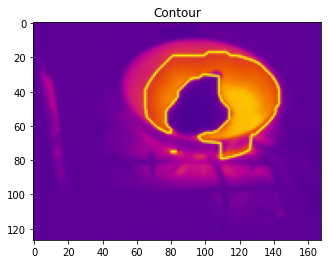

Average Temp of Contour 0 is: 138.57 °C
Average Temp of Contour 1 is: 181.02 °C
Current time is: 110 seconds


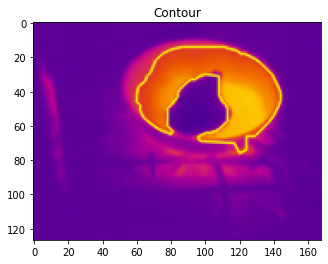

Average Temp of Contour 0 is: 188.57 °C
Current time is: 120 seconds


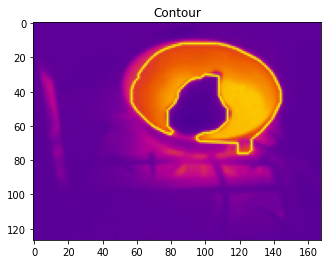

Average Temp of Contour 0 is: 192.41 °C
Current time is: 130 seconds


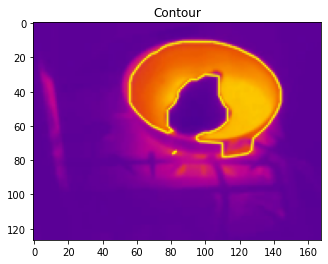

Average Temp of Contour 0 is: 138.24 °C
Average Temp of Contour 1 is: 134.65 °C
Average Temp of Contour 2 is: 196.29 °C
Current time is: 140 seconds


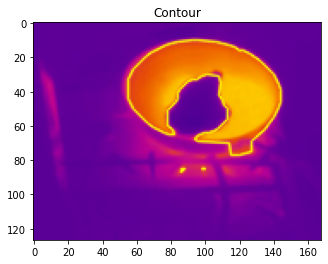

Average Temp of Contour 0 is: 136.33 °C
Average Temp of Contour 1 is: 133.98 °C
Average Temp of Contour 2 is: 202.27 °C
Current time is: 150 seconds


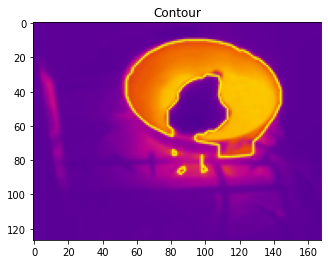

Average Temp of Contour 0 is: 138.82 °C
Average Temp of Contour 1 is: 130.97 °C
Average Temp of Contour 2 is: 131.21 °C
Average Temp of Contour 3 is: 206.00 °C
Current time is: 160 seconds


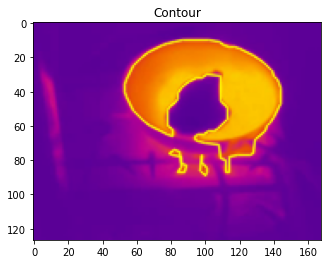

Average Temp of Contour 0 is: 133.90 °C
Average Temp of Contour 1 is: 134.16 °C
Average Temp of Contour 2 is: 211.27 °C
Current time is: 170 seconds


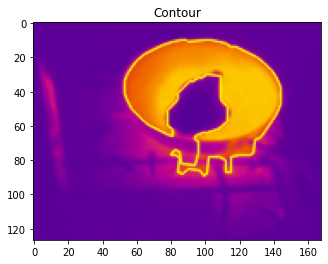

Average Temp of Contour 0 is: 209.28 °C
Current time is: 180 seconds


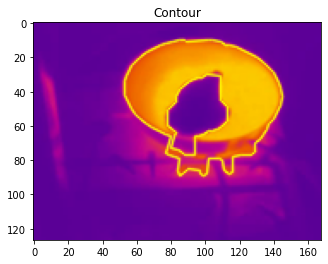

Average Temp of Contour 0 is: 56.04 °C
Average Temp of Contour 1 is: 178.57 °C
Current time is: 190 seconds


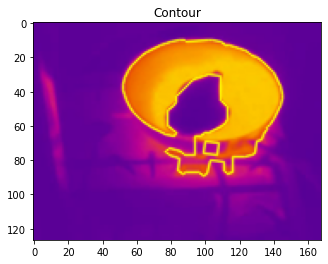

Average Temp of Contour 0 is: 95.72 °C
Average Temp of Contour 1 is: 213.04 °C
Current time is: 200 seconds


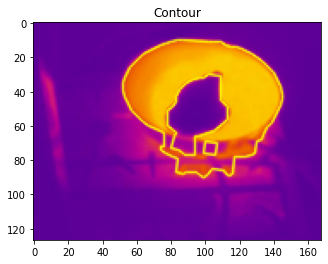

Average Temp of Contour 0 is: 96.41 °C
Average Temp of Contour 1 is: 57.55 °C
Average Temp of Contour 2 is: 183.10 °C
Current time is: 210 seconds


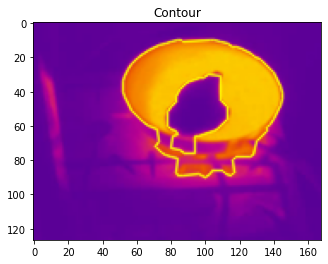

Average Temp of Contour 0 is: 58.81 °C
Average Temp of Contour 1 is: 185.17 °C
Current time is: 220 seconds


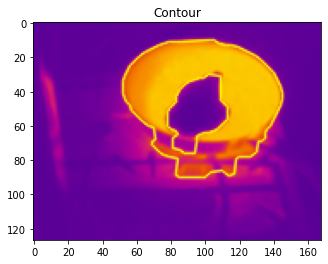

Average Temp of Contour 0 is: 59.63 °C
Average Temp of Contour 1 is: 186.95 °C
Current time is: 230 seconds


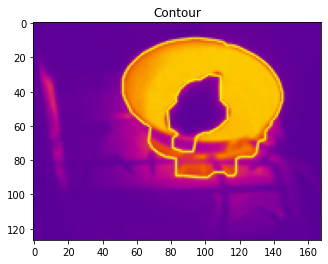

Average Temp of Contour 0 is: 60.21 °C
Average Temp of Contour 1 is: 188.25 °C
Current time is: 240 seconds


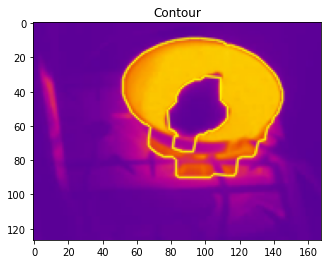

Average Temp of Contour 0 is: 60.47 °C
Average Temp of Contour 1 is: 190.37 °C
Current time is: 250 seconds


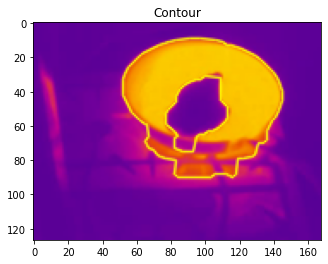

Average Temp of Contour 0 is: 62.43 °C
Average Temp of Contour 1 is: 192.34 °C
Current time is: 260 seconds


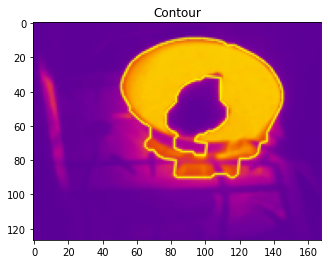

Average Temp of Contour 0 is: 66.25 °C
Average Temp of Contour 1 is: 194.07 °C
Current time is: 270 seconds


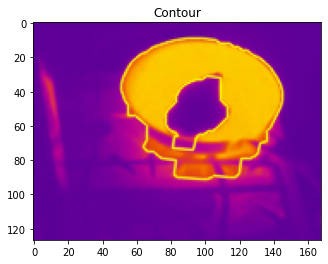

Average Temp of Contour 0 is: 63.53 °C
Average Temp of Contour 1 is: 195.03 °C
Current time is: 280 seconds


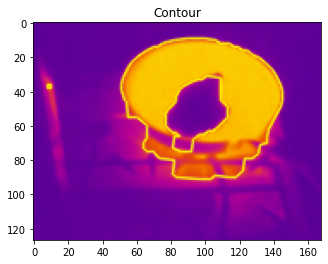

Average Temp of Contour 0 is: 130.77 °C
Average Temp of Contour 1 is: 64.50 °C
Average Temp of Contour 2 is: 196.06 °C
Current time is: 290 seconds


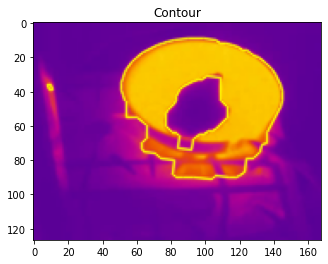

Average Temp of Contour 0 is: 139.58 °C
Average Temp of Contour 1 is: 133.19 °C
Average Temp of Contour 2 is: 63.86 °C
Average Temp of Contour 3 is: 197.28 °C
Current time is: 300 seconds


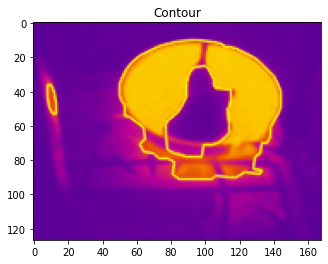

Average Temp of Contour 0 is: 132.96 °C
Average Temp of Contour 1 is: 63.34 °C
Average Temp of Contour 2 is: 186.53 °C
Current time is: 310 seconds


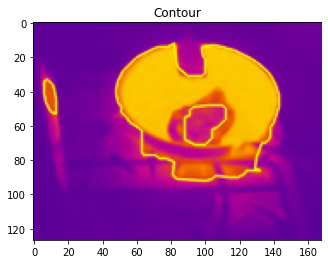

Average Temp of Contour 0 is: 116.71 °C
Average Temp of Contour 1 is: 142.65 °C
Average Temp of Contour 2 is: 209.19 °C
Current time is: 320 seconds


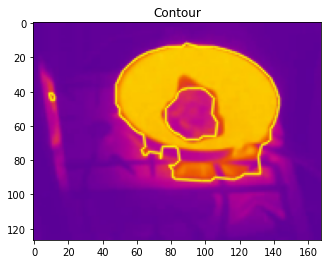

Average Temp of Contour 0 is: 130.84 °C
Average Temp of Contour 1 is: 110.87 °C
Average Temp of Contour 2 is: 212.87 °C
Current time is: 330 seconds


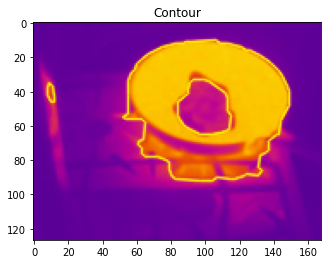

Average Temp of Contour 0 is: 131.98 °C
Average Temp of Contour 1 is: 105.24 °C
Average Temp of Contour 2 is: 207.74 °C
Current time is: 340 seconds


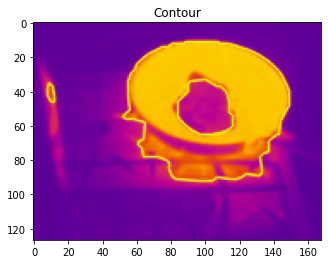

Average Temp of Contour 0 is: 132.29 °C
Average Temp of Contour 1 is: 102.23 °C
Average Temp of Contour 2 is: 207.45 °C
Current time is: 350 seconds


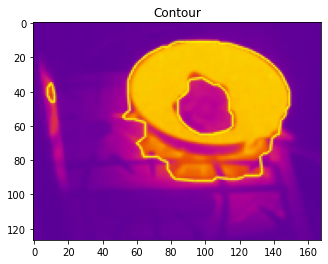

Average Temp of Contour 0 is: 132.05 °C
Average Temp of Contour 1 is: 100.79 °C
Average Temp of Contour 2 is: 207.81 °C
Current time is: 360 seconds


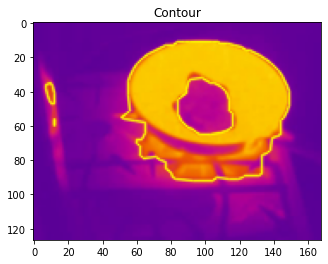

Average Temp of Contour 0 is: 136.89 °C
Average Temp of Contour 1 is: 131.85 °C
Average Temp of Contour 2 is: 98.89 °C
Average Temp of Contour 3 is: 208.00 °C
Current time is: 370 seconds


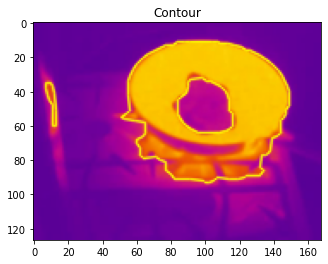

Average Temp of Contour 0 is: 132.03 °C
Average Temp of Contour 1 is: 95.51 °C
Average Temp of Contour 2 is: 208.39 °C
Current time is: 380 seconds


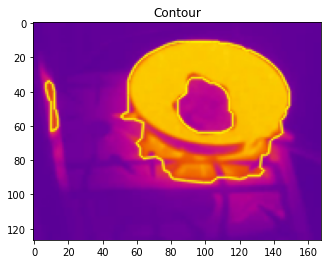

Average Temp of Contour 0 is: 131.07 °C
Average Temp of Contour 1 is: 95.28 °C
Average Temp of Contour 2 is: 208.98 °C
Current time is: 390 seconds


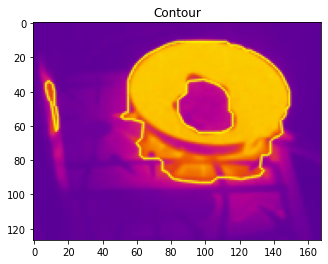

Average Temp of Contour 0 is: 93.64 °C
Average Temp of Contour 1 is: 133.45 °C
Average Temp of Contour 2 is: 208.99 °C
Current time is: 400 seconds


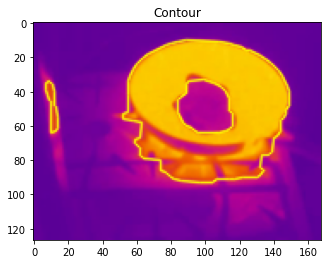

Average Temp of Contour 0 is: 92.70 °C
Average Temp of Contour 1 is: 134.87 °C
Average Temp of Contour 2 is: 209.68 °C
Current time is: 410 seconds


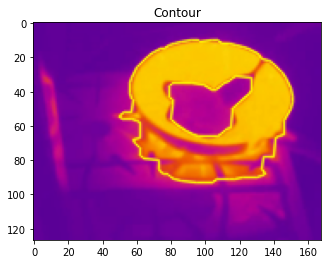

Average Temp of Contour 0 is: 90.21 °C
Average Temp of Contour 1 is: 196.74 °C
Current time is: 420 seconds


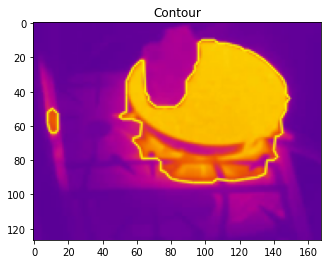

Average Temp of Contour 0 is: 145.44 °C
Average Temp of Contour 1 is: 224.62 °C
Current time is: 430 seconds


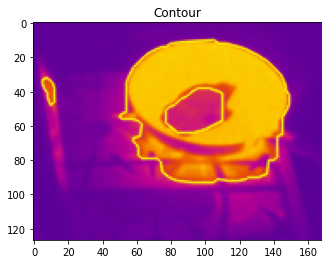

Average Temp of Contour 0 is: 118.32 °C
Average Temp of Contour 1 is: 140.13 °C
Average Temp of Contour 2 is: 212.96 °C
Current time is: 440 seconds


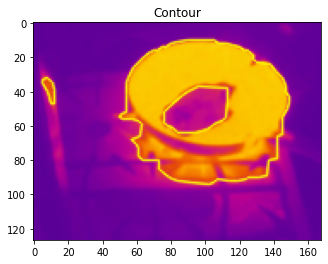

Average Temp of Contour 0 is: 101.89 °C
Average Temp of Contour 1 is: 140.77 °C
Average Temp of Contour 2 is: 209.89 °C
Current time is: 450 seconds


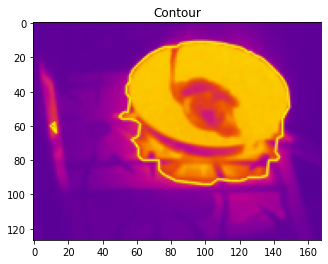

Average Temp of Contour 0 is: 136.36 °C
Average Temp of Contour 1 is: 217.07 °C
Current time is: 460 seconds


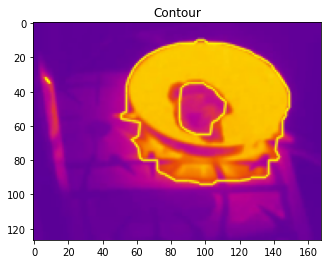

Average Temp of Contour 0 is: 111.09 °C
Average Temp of Contour 1 is: 138.74 °C
Average Temp of Contour 2 is: 212.83 °C
Current time is: 470 seconds


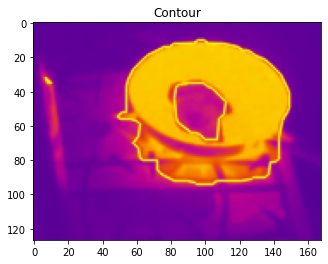

Average Temp of Contour 0 is: 106.55 °C
Average Temp of Contour 1 is: 135.46 °C
Average Temp of Contour 2 is: 211.64 °C
Current time is: 480 seconds


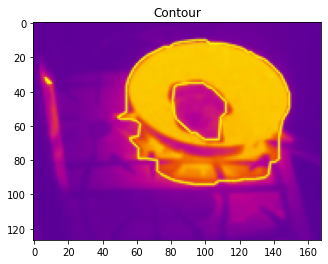

Average Temp of Contour 0 is: 103.42 °C
Average Temp of Contour 1 is: 137.23 °C
Average Temp of Contour 2 is: 210.89 °C
Current time is: 490 seconds


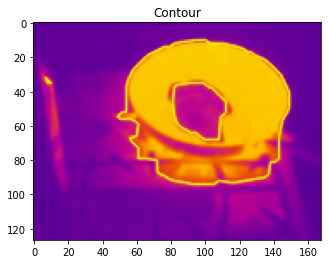

Average Temp of Contour 0 is: 101.19 °C
Average Temp of Contour 1 is: 138.40 °C
Average Temp of Contour 2 is: 210.89 °C
Current time is: 500 seconds


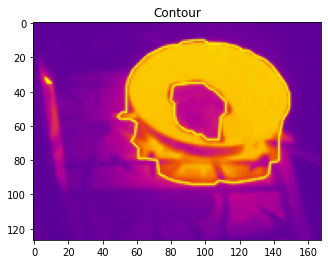

Average Temp of Contour 0 is: 100.20 °C
Average Temp of Contour 1 is: 137.48 °C
Average Temp of Contour 2 is: 211.43 °C
Current time is: 510 seconds


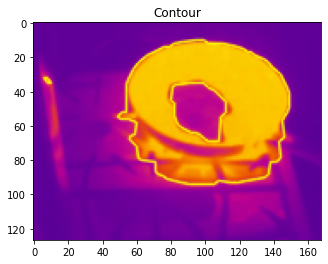

Average Temp of Contour 0 is: 97.30 °C
Average Temp of Contour 1 is: 135.88 °C
Average Temp of Contour 2 is: 210.67 °C
Current time is: 520 seconds


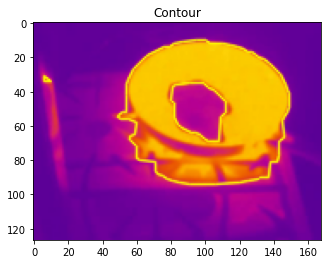

Average Temp of Contour 0 is: 95.87 °C
Average Temp of Contour 1 is: 134.20 °C
Average Temp of Contour 2 is: 210.38 °C
Current time is: 530 seconds


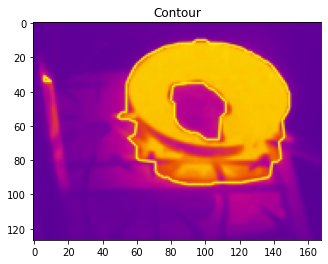

Average Temp of Contour 0 is: 93.57 °C
Average Temp of Contour 1 is: 135.39 °C
Average Temp of Contour 2 is: 210.64 °C
Current time is: 540 seconds


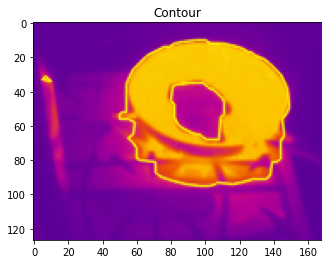

Average Temp of Contour 0 is: 93.37 °C
Average Temp of Contour 1 is: 136.27 °C
Average Temp of Contour 2 is: 210.98 °C
Current time is: 550 seconds


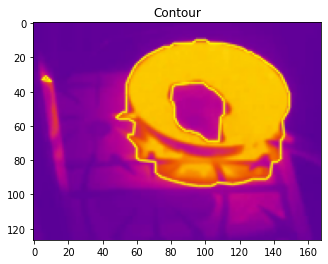

Average Temp of Contour 0 is: 92.49 °C
Average Temp of Contour 1 is: 136.55 °C
Average Temp of Contour 2 is: 210.71 °C
Current time is: 560 seconds


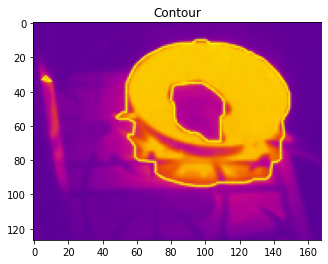

Average Temp of Contour 0 is: 92.62 °C
Average Temp of Contour 1 is: 134.87 °C
Average Temp of Contour 2 is: 211.38 °C
Current time is: 570 seconds


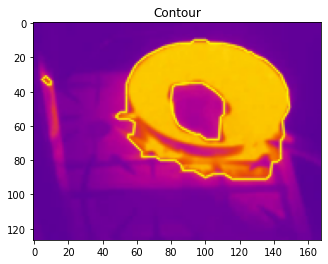

Average Temp of Contour 0 is: 94.51 °C
Average Temp of Contour 1 is: 136.41 °C
Average Temp of Contour 2 is: 213.11 °C
Current time is: 580 seconds


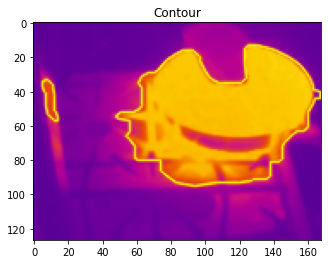

Average Temp of Contour 0 is: 138.16 °C
Average Temp of Contour 1 is: 230.14 °C
Current time is: 590 seconds


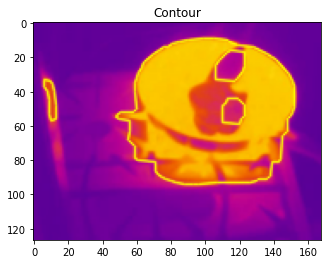

Average Temp of Contour 0 is: 125.09 °C
Average Temp of Contour 1 is: 138.39 °C
Average Temp of Contour 2 is: 102.63 °C
Average Temp of Contour 3 is: 214.46 °C


In [437]:
i = 0
sampleRate = 10
for frame in frames:
    print("Current time is:", i*10,"seconds")
    frame = resizeImage(frame, 30)
    frame = cropImage(frame, 5)
    getContours(frame)
    i+=1

In [ ]:
    def newTempRange(img, high, low):

        tempScaleImg = cv2.imread(img)
        tempArr = np.array(tempScaleImg)
        
        x = tempArr.shape[0] #Rows
        y = tempArr.shape[1] #Cols
        

        #Find the average rgb value in each row
        tempAvgArr = tempArr[0:x, 0]
        
        return tempAvgArr

In [ ]:
tempArr = newTempRange("TempScaleImg.jpg", 350, -50)

In [438]:
    
    """
    Different functions used to filter image. Dumped here to refer to later
    """
    #Transorm the image because (reasons)
    #img = cv2.GaussianBlur(img,(11, 11),cv2.BORDER_DEFAULT)
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #hsv1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    #h, s, v = cv2.split(hsv1)
    #thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
    # Normalize the image
    #normIR = cv2.normalize(img_gray, img_gray, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Use a bilateral filter to blur while hopefully retaining edges
    #brightBlurIR = cv2.bilateralFilter(img_gray,9,150,150)

    # Threshold the image to black and white 
    #threshIR = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)

    # Define kernal for erosion and dilation and closing operations
    #kernel = np.ones((5,5),np.uint8)
    #erosionIR = cv2.erode(threshIR,kernel,iterations = 1)
    #dilationIR = cv2.dilate(erosionIR,kernel,iterations = 1)
    #closingIR = cv2.morphologyEx(dilationIR, cv2.MORPH_CLOSE, kernel)

    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img_blur = cv2.GaussianBlur(img_gray,(3, 3),cv2.BORDER_DEFAULT)
    # Blur the image for better edge detection
    #threshIR = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
    
    #Perform Morphology
    #se = np.ones((7,7), dtype='uint8')
    #image_close = cv2.morphologyEx(threshIR, cv2.MORPH_CLOSE, se)
    #img = cv2.GaussianBlur(img,(3, 3),cv2.BORDER_CONSTANT)

'\nDifferent functions used to filter image. Dumped here to refer to later\n'